In [ ]:
# #!pip install friends
# import pandas as pd
# with open('data/wikilarge/wiki_train.src', 'r', encoding='utf-8') as f:
#     src = [line.strip() for line in f.readlines()]
# src = pd.DataFrame(src, columns=['src'])
# with open('data/wikilarge/wiki_train.tgt', 'r', encoding='utf-8') as f:
#     tgt = [line.strip() for line in f.readlines()]
# tgt = pd.DataFrame(tgt, columns=['tgt'])
# infos = pd.read_csv('data/wikilarge/grade_ratio_wiki_train.csv')
# data = pd.concat([src, tgt, infos], axis=1)
# initial_size = data.shape[0]
# print(data.shape)
# data = data#[data['Length_ratio'] > 0.25]
# # final_size = data.shape[0]
# # print(f"Removed {initial_size - final_size} samples ({round(100*(initial_size - final_size)/initial_size,2)}%)")
# # print(data)

In [ ]:
"""word2vec on src and tgt, add similarity column"""
# from tqdm import tqdm
# tqdm.pandas()
# #!python -m spacy download en_core_web_sm
# import spacy
# nlp = spacy.load("en_core_web_sm")
# import en_core_web_sm
# nlp = en_core_web_sm.load()
# texts = data[['src', 'tgt']].copy()
# texts['src'] = texts['src'].progress_apply(lambda x: nlp(x))
# texts['tgt'] = texts['tgt'].progress_apply(lambda x: nlp(x))
# texts['similarity'] = texts.progress_apply(lambda x: x['src'].similarity(x['tgt']), axis=1)
# data['similarity'] = texts['similarity']
# data.to_csv('data/wikilarge/wiki_train.csv', index=False)
# print(data.shape)
# data['grade_difference'] = data['abs_tgt_FKGL_Grade'] - data['abs_src_FKGL_Grade']

In [ ]:
# goodns = data[(data['similarity'] > 0.6) & (data['Length_ratio'] > 0.15)]
# print(goodns.shape)
# print(goodns.abs_tgt_FKGL_Grade.value_counts().sort_index())
# for i, line in goodns.iterrows():
#     print(f"src: {line['src']}")
#     print(f"tgt: {line['tgt']}")
#     print(f"similarity: {line['similarity']}")
#     print(f"Length_ratio: {line['Length_ratio']}")
#     print(f"grade_difference: {line['grade_difference']}")
#     print()
#     if i == 100:
#         break

In [ ]:
# similarities = dict()
# for i, row in data.iterrows():
#     if row.similarity == "nan":
#         src = nlp(row['src'])
#         tgt = nlp(row['tgt'])
#         similarity = src.similarity(tgt)
#         similarities[i] = similarity
#         print(similarity)
# similarities = pd.DataFrame(similarities.values(), index=similarities.keys(), columns=['similarity'])
# similarities.describe()
# grade_diff = data.abs_tgt_FKGL_Grade - data.abs_src_FKGL_Grade
# data['grade_diff'] = grade_diff

In [ ]:
# missing = data[data['similarity'].isna() == True]
# temp = missing[['src', 'tgt']].copy()
# temp['src'] = temp['src'].map(lambda x: nlp(x))
# temp['tgt'] = temp['tgt'].map(lambda x: nlp(x))
# temp['similarity'] = temp.map(lambda x: x['src'].similarity(x['tgt']))
# missing['similarity'] = temp['similarity']
# missing = data[data['similarity'].isna() == True]
# print(missing)
# print(missing.describe())

In [ ]:
# data.pivot(columns="abs_tgt_FKGL_Grade")["similarity"].plot(kind="hist", stacked=True, bins=50, xticks=[i/100 for i in range(0, 105, 5)], 
#                                                         title="Length ratio distribution by FKGL src : tgt grade difference", 
#                                                         colormap='Reds', xlabel="Length ratio", figsize=(20, 10))

In [ ]:
# data.pivot(columns="abs_src_FKGL_Grade")["similarity"].plot(kind="hist", stacked=True, bins=50, xticks=[i/100 for i in range(0, 105, 5)], 
#                                                         title="Length ratio distribution by FKGL src : tgt grade difference", 
#                                                         colormap='Reds', xlabel="Length ratio", figsize=(20, 10))

In [ ]:
# shorties = data[data['Length_ratio'] < 0.3]
# shorties = shorties[['src', 'tgt']]
# print(shorties.shape)
# for i, row in shorties.iterrows():
#     print('src:', row['src'])
#     print('tgt:', row['tgt'])
#     print()

In [ ]:
# import numpy as np
# filtered_data = data.copy()#[data['Length_ratio'] > 0.2]
# filtered_data['Length_ratio'] = filtered_data['Length_ratio'] - 1
# easier = filtered_data[filtered_data["grade_diff"] < 0]
# harder = filtered_data[filtered_data["grade_diff"] > 0]
# same = filtered_data[filtered_data["grade_diff"] == 0]
# # top_half = filtered_data[filtered_data["abs_tgt_FKGL_Grade"] >= 7]
# easier.pivot(columns="grade_diff")["Length_ratio"].plot(kind="hist", stacked=True, bins=50, xticks=[i/100 for i in range(-100, 105, 5)], 
#                                                         xlim=(-1,1),
#                                                         title="Length ratio distribution by FKGL src : tgt grade difference", 
#                                                         colormap='Reds', xlabel="Length ratio", figsize=(20, 10))
# print('negative grade diff means tgt text is "easier" to read')

In [ ]:
# harder.pivot(columns="grade_diff")["Length_ratio"].plot(kind="hist", stacked=True, bins=50, xticks=[i/100 for i in range(-100, 105, 5)], 
#                                                         xlim=(-1,1),
#                                                         title="Length ratio distribution by FKGL src : tgt grade difference", 
#                                                         colormap='Reds', xlabel="Length ratio", figsize=(20, 10))
# print('larger grade diff means tgt text is "harder" to read')

In [ ]:
# same.pivot(columns="grade_diff")["Length_ratio"].plot(kind="hist", stacked=True, bins=50, xticks=[i/100 for i in range(0, 205, 5)], 
#                                                         xlim=(-1,1),
#                                                         title="Length ratio distribution by FKGL src : tgt grade difference", 
#                                                         xlabel="Length ratio", figsize=(20, 10))
# fuckery = data[data["Length_ratio"] < 0.25]
# print(fuckery.shape)

In [ ]:
# golden_value = filtered_data.Length_ratio * (filtered_data.grade_diff + 13)
# golden_value.plot(kind="hist", bins=50, xlim=(-25, 25), ylim=(0, 2500), figsize=(20, 10), title="Golden value distribution")

In [ ]:
# filtered_data['golden_value'] = golden_value - golden_value.mean()
# std = filtered_data["golden_value"].std(axis=0)
# print(filtered_data.shape)
# remove_outliers = filtered_data[(filtered_data["golden_value"] < (2 * std)) & (filtered_data["golden_value"] > (-2 * std))].copy()
# print(remove_outliers.shape)

In [ ]:
# remove_outliers.golden_value.plot(kind="hist", bins=50, xlim=(-25, 25), ylim=(0, 10000), figsize=(20, 10), title="Golden value distribution")

In [ ]:
# remove_outliers = remove_outliers.reset_index(drop=True)
# remove_bad_simplifications = remove_outliers[(remove_outliers["golden_value"] > -5) & (remove_outliers["Length_ratio"] > -0.5)]
# for i, row in remove_bad_simplifications.sample(100).iterrows():
#     print('src:', row['src'])
#     print('tgt:', row['tgt'])
#     print()

In [ ]:
# """Potentially informative description of the difference in FKGL grade between source and target"""
# info_frame = pd.read_csv('data/wikilarge/grade_ratio_wiki_train.csv')
# grade_diff = info_frame["abs_tgt_FKGL_Grade"] - info_frame["abs_src_FKGL_Grade"]
# percent_zero_diff = round(100 * grade_diff.value_counts()[0] / grade_diff.shape[0], 2)
# grade_diff.plot(kind="hist", bins=27, title="Difference in FKGL Grade between Source and Target",
#                 ylabel="Count", xlabel="Grade Difference (negative values -> tgt is lower grade than src)")
# print(f"Percent of examples with no difference in FKGL grade: {percent_zero_diff}%")
# print(f"Percent of examples where tgt is higher grade than src: {round(100 * grade_diff[grade_diff > 0].shape[0] / grade_diff.shape[0], 2)}%")
# print(f"Percent of examples where tgt is lower grade than src: {round(100 * grade_diff[grade_diff < 0].shape[0] / grade_diff.shape[0], 2)}%")

In [ ]:
# info_frame['abs_src_FKGL_Grade'].plot(kind="hist", bins=13, title="FKGL Grade of Source Text")
# print(info_frame['abs_src_FKGL_Grade'].value_counts().sort_index())

In [ ]:
# info_frame['abs_tgt_FKGL_Grade'].plot(kind="hist", bins=13, title="FKGL Grade of Target Text")
# print(info_frame['abs_tgt_FKGL_Grade'].value_counts().sort_index())

In [ ]:
# grades = pd.read_csv('data/wikilarge/grade_ratio_wiki_train.csv')
# from collections import defaultdict
# grade_dicts = defaultdict(int)
# for i in range(0, 14):
#     grade_dicts[i] = grades[grades["abs_src_FKGL_Grade"] == i]
# no_diff = grades[grades["abs_src_FKGL_Grade"] == grades["abs_tgt_FKGL_Grade"]]
# totals = grades["abs_src_FKGL_Grade"].value_counts()
# no_diff['abs_src_FKGL_Grade'].value_counts()
# percent_no_diff = round(100 * no_diff['abs_src_FKGL_Grade'].value_counts() / totals, 2)
# percent_no_diff.plot(kind="bar", title="Percent of Examples with No Difference in FKGL Grade", ylabel="Percent", xlabel="src/tgt FKGL Grade", ylim=(0, 100))
# print(no_diff.head())

In [ ]:
"""Example of manual download of dataset from huggingface hub"""
# from huggingface_hub import hf_hub_download
# data = hf_hub_download(repo_id="williamplacroix/wikilarge_alpaca_json", filename="train.json", repo_type="dataset")
# train = pd.read_json(data)
# train

### I need datasets for:
- full baseline finetuning {e.g. 2-12 train, 2-12 test}
- combined grade finetuning {e.g. 6+8 train, 7 test}
- single grade finetuning {e.g. 6 train, 6 test for all grades}
- GPT prompting with grade 6 x 3, grade 8 x 3, ask for grade 7

### I need to:
- subset the datasets at each level for consistent test set size
- batch into HF_hub repos for the various experiments
- experiment 1: full baseline finetuning with testing on all levels as "best" baseline
- experiment 2: combined two-grade finetuning with testing on the intermediate grade
- experiment 3: single-grade finetuning with testing on the same grade
- experiment 4: GPT prompting with grade 6 x 3, grade 8 x 3, ask for grade 7

### Followup:
- Training for 1 experminet at a time
- Figure out how to run as eval
- Figure out how to incorporate SARI as eval metric


In [1]:
import pandas as pd

data = pd.read_csv('data/wikilarge/wiki_train.csv')
data.head()

,src,tgt,current_line,New Line,Line,abs_src_Length,abs_src_MaxDepDepth,abs_src_MaxDepLength,abs_src_DiffWords,abs_src_Leven,...,abs_src_FreqRank,abs_tgt_FreqRank,FreqRank_ratio,abs_src_FKGL_Grade,abs_tgt_FKGL_Grade,FKGL_Grade_ratio,abs_src_ARI_Grade,abs_tgt_ARI_Grade,ARI_Grade_ratio,similarity
0,Heinrich Luitpold Himmler (7 October 1900 - 23...,"Heinrich Himmler (October 7, 1900 - May 23, 19...",1,1,243129,117.0,5.0,10.0,6.0,0.70,...,9.72,9.98,1.03,11,10,0.91,11,11,1.00,0.879662
1,She would then recite a verse: When Emily had ...,"When Emily had left, Bagpuss would wake up.",2,2,67231,74.0,3.0,11.0,3.0,0.74,...,8.87,8.65,0.98,4,3,0.75,6,4,0.67,0.849127
2,Viva la Vida was re-released on 25 November 20...,"""Prospekts March\/Poppyfields""",3,3,38630,127.0,8.0,6.0,8.0,0.20,...,9.61,14.51,1.51,11,13,1.18,12,14,1.17,0.069626
3,However the genre remains a very small proport...,However the area is still a very small groupin...,4,4,259576,206.0,7.0,19.0,9.0,0.87,...,9.39,9.65,1.03,10,7,0.70,11,7,0.64,0.926473
4,Villers-sur-F Ã re is a commune in the Aisne d...,Villers-sur-F Ã re is a commune. It is found i...,5,5,199162,86.0,5.0,7.0,3.0,0.73,...,11.17,9.90,0.89,6,3,0.50,9,4,0.44,0.917007


<Axes: title={'center': 'Similarity between Source and Target Texts'}, xlabel='Similarity', ylabel='Count'>

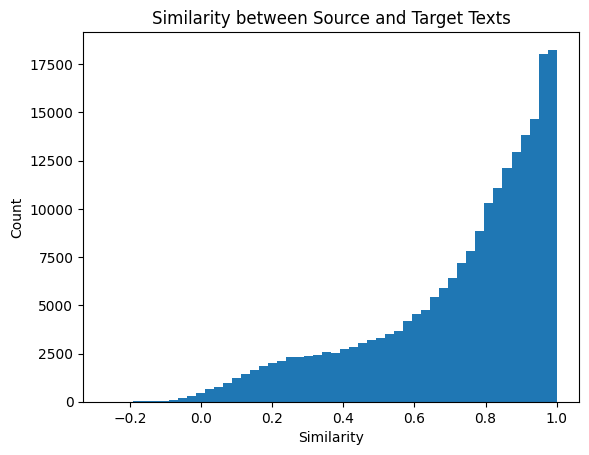

In [2]:
data.similarity.plot(kind="hist", bins=50, title="Similarity between Source and Target Texts", xlabel="Similarity", ylabel="Count")

<Axes: title={'center': 'Length Ratio between Source and Target Texts'}, xlabel='Length Ratio', ylabel='Count'>

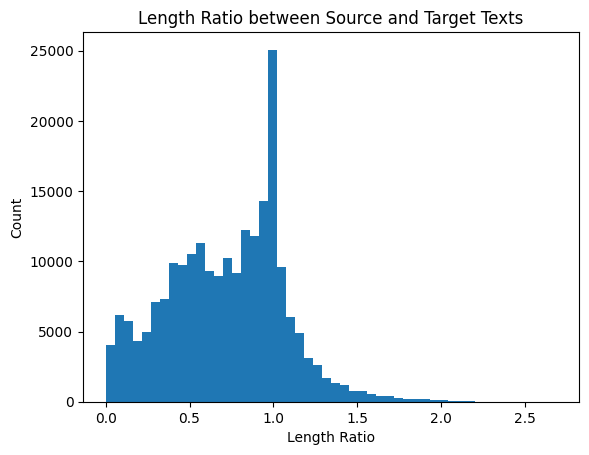

In [4]:
data.Length_ratio.plot(kind="hist", bins=50, title="Length Ratio between Source and Target Texts", xlabel="Length Ratio", ylabel="Count")

<Axes: title={'center': 'Difference in FKGL Grade between Source and Target Texts'}, xlabel='Grade Difference', ylabel='Count'>

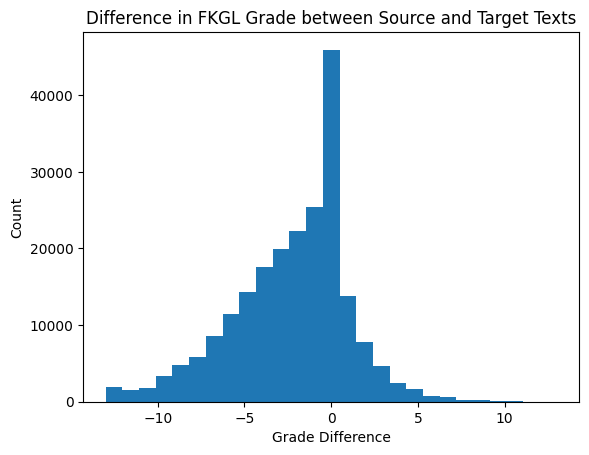

In [15]:
data["grade_difference"] = data.abs_tgt_FKGL_Grade - data.abs_src_FKGL_Grade
data.grade_difference.plot(kind="hist", bins=27, title="Difference in FKGL Grade between Source and Target Texts", xlabel="Grade Difference", ylabel="Count")

C:\Users\William\AppData\Local\Temp\ipykernel_9832\2980553214.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(regression_set.Length_ratio, regression_set.similarity, regression_set.grade_difference, cmap='viridis', marker='.')#, c=regression_set.label)


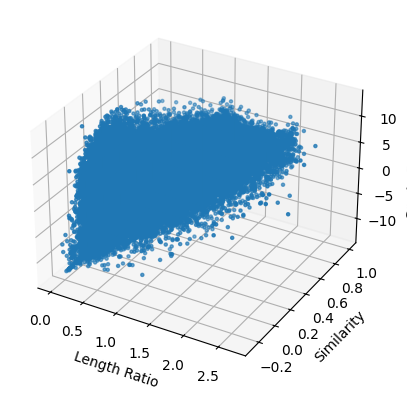

In [ ]:
regression_set = data[['Length_ratio', 'similarity', 'grade_difference']].copy()
regression_sample = regression_set.sample(1000)
#regression_sample.plot.scatter(x='Length_ratio', y='similarity', c='grade_difference', colormap='viridis', title="Length Ratio vs. Similarity vs. Grade Difference")


import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(regression_set.Length_ratio, 
           regression_set.similarity, 
           regression_set.grade_difference, 
           cmap='viridis', marker='.')#, c=regression_set.label)
ax.set_xlabel('Length Ratio')
ax.set_ylabel('Similarity')
ax.set_zlabel('Grade Difference')
plt.show()

In [50]:
labelled = pd.read_csv('data/wikilarge/wiki_train_labelled.csv').drop(columns=["(2, 'label')", "(3, 'label')", "(4, 'label')", "(5, 'label')",
       "(6, 'label')", "(7, 'label')", "(8, 'label')", "(2, 'label').1",
       "(3, 'label').1", "(4, 'label').1", "(5, 'label').1", "(6, 'label').1"])


In [51]:
labelled.columns

Index(['src', 'tgt', 'current_line', 'New Line', 'Line', 'abs_src_Length',
       'abs_src_MaxDepDepth', 'abs_src_MaxDepLength', 'abs_src_DiffWords',
       'abs_src_Leven', 'abs_src_WordCount', 'abs_tgt_Length',
       'abs_tgt_MaxDepDepth', 'abs_tgt_MaxDepLength', 'abs_tgt_DiffWords',
       'abs_tgt_Leven', 'abs_tgt_WordCount', 'Length_ratio',
       'MaxDepDepth_ratio', 'MaxDepLength_ratio', 'DiffWords_ratio',
       'Leven_ratio', 'WordCount_ratio', 'abs_src_FreqRank',
       'abs_tgt_FreqRank', 'FreqRank_ratio', 'abs_src_FKGL_Grade',
       'abs_tgt_FKGL_Grade', 'FKGL_Grade_ratio', 'abs_src_ARI_Grade',
       'abs_tgt_ARI_Grade', 'ARI_Grade_ratio', 'similarity', 'label'],
      dtype='object')

In [53]:
src_length = labelled['src'].apply(lambda x: len(x.split()))
tgt_length = labelled['tgt'].apply(lambda x: len(x.split()))
length_difference_ratio = (tgt_length - src_length) / src_length
labelled['length_difference_ratio'] = length_difference_ratio
labelled['grade_difference'] = labelled['abs_tgt_FKGL_Grade'] - labelled['abs_src_FKGL_Grade']


(1000, 3)


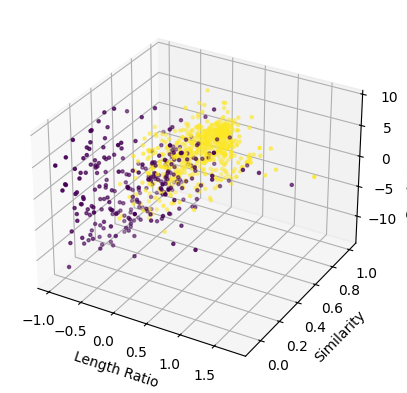

<Figure size 1500x1000 with 0 Axes>

In [ ]:
regression_set = labelled[['length_difference_ratio', 'similarity', 'grade_difference']].copy()
regression_labels = labelled['label'].copy()
print(regression_set.shape)
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(regression_set.length_difference_ratio, 
           regression_set.similarity, 
           regression_set.grade_difference, 
           cmap='viridis', marker='.', c=regression_labels)
ax.set_xlabel('Length Ratio')
ax.set_ylabel('Similarity')
ax.set_zlabel('Grade Difference')
plt.figure(figsize=(15, 10))
plt.show()

In [61]:
print(regression_set.to_numpy().shape) 

(1000, 3)


In [ ]:
# logistic regression to classify label based on length difference ratio, similarity, and grade difference
from sklearn.linear_model import LogisticRegression as LR

model = LR()
model.fit()
print(model.score(regression_set.to_numpy(), regression_labels.to_numpy()))


0.883


In [126]:
# lazy predict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB as BNB

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
bnb = BNB()

so_much_data = pd.read_csv('data/wikilarge/wiki_train_labelled.csv').drop(columns=["(2, 'label')", "(3, 'label')", "(4, 'label')", "(5, 'label')",
       "(6, 'label')", "(7, 'label')", "(8, 'label')", "(2, 'label').1",
       "(3, 'label').1", "(4, 'label').1", "(5, 'label').1", "(6, 'label').1"])
x = regression_set.to_numpy()
y = regression_labels.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models.loc[models.index[0]]['F1 Score'])
# bnb.fit(X_train, y_train)
# BNB()
# print(bnb.score(X_test, y_test))


100%|██████████| 31/31 [00:00<00:00, 33.84it/s]

[LightGBM] [Info] Number of positive: 655, number of negative: 245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.727778 -> initscore=0.983377
[LightGBM] [Info] Start training from score 0.983377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [101]:
print(models.loc[models.index[0]]['F1 Score'])


0.94


In [63]:
full_dataset = data.copy()
full_src_length = full_dataset['src'].apply(lambda x: len(x.split()))
full_tgt_length = full_dataset['tgt'].apply(lambda x: len(x.split()))
full_length_difference_ratio = (full_tgt_length - full_src_length) / full_src_length
full_dataset['length_difference_ratio'] = full_length_difference_ratio
full_dataset['grade_difference'] = full_dataset['abs_tgt_FKGL_Grade'] - full_dataset['abs_src_FKGL_Grade']
full_regression_set = full_dataset[['length_difference_ratio', 'similarity', 'grade_difference']].copy()
full_regression_labels = model.predict(full_regression_set.to_numpy())
full_dataset['label'] = full_regression_labels
print(full_dataset.label.value_counts())

label
1    167194
0     49687
Name: count, dtype: int64


In [69]:
print(model.score(full_dataset[['length_difference_ratio', 'similarity', 'grade_difference']].to_numpy(), full_dataset.label.to_numpy()))

1.0


In [67]:
full_dataset.to_csv('data/wikilarge/full_wiki_train_labelled.csv', index=False)

Index(['src', 'tgt', 'current_line', 'New Line', 'Line', 'abs_src_Length',
       'abs_src_MaxDepDepth', 'abs_src_MaxDepLength', 'abs_src_DiffWords',
       'abs_src_Leven', 'abs_src_WordCount', 'abs_tgt_Length',
       'abs_tgt_MaxDepDepth', 'abs_tgt_MaxDepLength', 'abs_tgt_DiffWords',
       'abs_tgt_Leven', 'abs_tgt_WordCount', 'Length_ratio',
       'MaxDepDepth_ratio', 'MaxDepLength_ratio', 'DiffWords_ratio',
       'Leven_ratio', 'WordCount_ratio', 'abs_src_FreqRank',
       'abs_tgt_FreqRank', 'FreqRank_ratio', 'abs_src_FKGL_Grade',
       'abs_tgt_FKGL_Grade', 'FKGL_Grade_ratio', 'abs_src_ARI_Grade',
       'abs_tgt_ARI_Grade', 'ARI_Grade_ratio', 'similarity', 'label'],
      dtype='object')
[100 200 300 400 500 600 700 800 900]


 11%|█         | 1/9 [00:00<00:05,  1.51it/s]

[LightGBM] [Info] Number of positive: 63, number of negative: 17
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.787500 -> initscore=1.309921
[LightGBM] [Info] Start training from score 1.309921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

 22%|██▏       | 2/9 [00:01<00:05,  1.39it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737500 -> initscore=1.033015
[LightGBM] [Info] Start training from score 1.033015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

 33%|███▎      | 3/9 [00:02<00:04,  1.35it/s]

[LightGBM] [Info] Number of positive: 181, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.754167 -> initscore=1.120960
[LightGBM] [Info] Start training from score 1.120960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

 44%|████▍     | 4/9 [00:02<00:03,  1.34it/s]

[LightGBM] [Info] Number of positive: 227, number of negative: 93
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.709375 -> initscore=0.892351
[LightGBM] [Info] Start training from score 0.892351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

 56%|█████▌    | 5/9 [00:03<00:02,  1.34it/s]

[LightGBM] [Info] Number of positive: 287, number of negative: 113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.717500 -> initscore=0.932094
[LightGBM] [Info] Start training from score 0.932094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

 67%|██████▋   | 6/9 [00:04<00:02,  1.30it/s]

[LightGBM] [Info] Number of positive: 351, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.731250 -> initscore=1.000974
[LightGBM] [Info] Start training from score 1.000974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

 78%|███████▊  | 7/9 [00:05<00:01,  1.23it/s]

[LightGBM] [Info] Number of positive: 396, number of negative: 164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.707143 -> initscore=0.881548
[LightGBM] [Info] Start training from score 0.881548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

 89%|████████▉ | 8/9 [00:06<00:00,  1.21it/s]

[LightGBM] [Info] Number of positive: 463, number of negative: 177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.723437 -> initscore=0.961577
[LightGBM] [Info] Start training from score 0.961577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


[LightGBM] [Info] Number of positive: 517, number of negative: 203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.718056 -> initscore=0.934837
[LightGBM] [Info] Start training from score 0.934837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

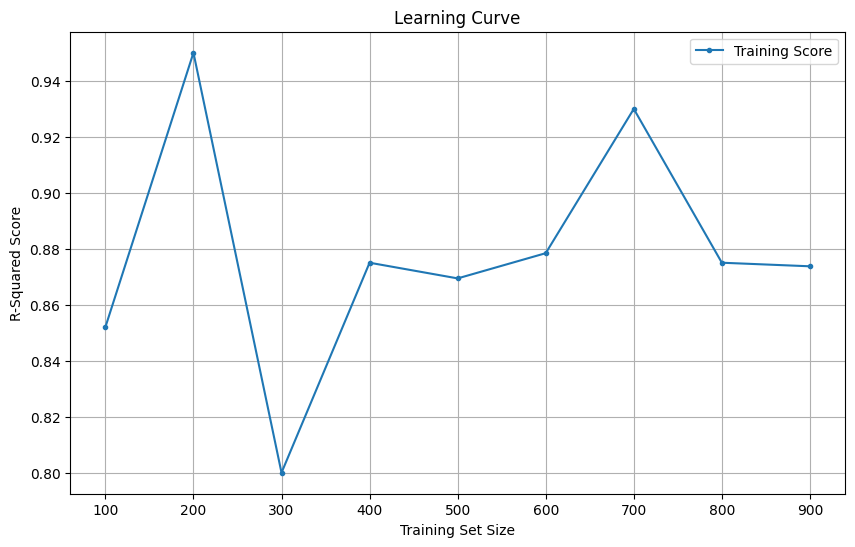

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def do_regression(x, y, train_size):
    x_train, x_test, y_train, y_test = train_test_split(x[:train_size], y[:train_size], test_size=0.2, random_state=42)
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, _ = clf.fit(x_train, x_test, y_train, y_test)
    return models.index[0], models.loc[models.index[0]]['F1 Score']

def plot_learning_curve(x, y, step=100):
    train_sizes = np.arange(step, len(x), step)
    print(train_sizes)
    train_scores = []
    best_model_names = []

    for train_size in tqdm(train_sizes):
        best_model_name, best_model_score = do_regression(x, y, train_size)
        train_scores.append(best_model_score)
        best_model_names.append(best_model_name)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Training Score', marker='.')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-Squared Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

#Example usage:
so_much_data = pd.read_csv('data/wikilarge/wiki_train_labelled.csv').drop(columns=["(2, 'label')", "(3, 'label')", "(4, 'label')", "(5, 'label')",
       "(6, 'label')", "(7, 'label')", "(8, 'label')", "(2, 'label').1",
       "(3, 'label').1", "(4, 'label').1", "(5, 'label').1", "(6, 'label').1"])
print(so_much_data.columns) 
x = regression_set.to_numpy()
y = regression_labels.to_numpy()
plot_learning_curve(x, y)